# Lab 25 - Hypothesis testing with multiple categories

We will learn how to test hypotheses when our categorical data has more than two categories.

First, let's import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Jury Panels in Alameda Country 2009-2010

We will look at jury panel data from 2009 and 2010 collected by the American Civil Liberties Union (ACLU).  The total number of people who reported for jury duty in those years was 1,452.  See [11.2 Multiple Categories](https://www.inferentialthinking.com/chapters/11/2/Multiple_Categories.html) for more information.

We can create a dataframe with this data as shown below. 

In [4]:
# create a dictionary listing each column, followed by the column values in a list
jury_data = {"Eligible":[0.15, 0.18, 0.12, 0.54, 0.01],
             "Panels":[0.26, 0.08, 0.08, 0.54, 0.04]}
# pass the dictionary into the dataframe creation function as a parameter
# also pass in labels for the rows
jury = pd.DataFrame(data = jury_data, index = ["Asian","Black","Latino/a","White","Other"])

What do you think are the columns and rows of the new dataframe?  Check your answer by displaying the dataframe `jury`. 

In [5]:
jury

,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino/a,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


We will now make a bar chart of the two columns of data.  Because our dataframe `jury` already contains counts of the different categories, we do not have to use the `value_count()` function. Instead, type `jury.plot(kind = "bar")` below.

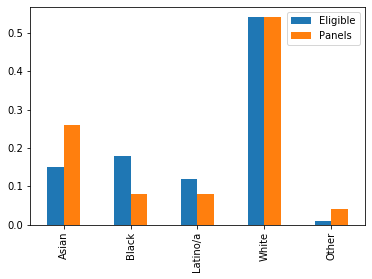

In [6]:
jury.plot(kind = "bar")

How does the distribution of eligible jurors compare with the distribution of the jury panels?

To know whether the variation between the distributions is just the result of chance, we can compute a random sample from the eligible distribution and compare it with the panel distribution.

First we create a variable for the eligible population and distribution.

In [16]:
population = ["Asian","Black","Latino/a","White","Other"]
pop_prob = [0.15, 0.18, 0.12, 0.54, 0.01]

We can create a sample from this population.  The sample should be the same size as our data.

In [17]:
sample = np.random.choice(population,p = pop_prob,size = 1453)

Compute the value counts for the sample (you will have to make it a Pandas Series first).  Since we only have the probabilities of the eligible population, we want to compute the value counts as probabilities as well.  We can do this by adding the parameter `normalize = True`.  Save the probabilities of the sample in the variable `sample_probs`.

In [18]:
sample = pd.Series(sample)
sample_probs = pd.value_counts(sample, normalize = True)

<details> <summary>Answer:</summary>
    <code>sample_probs = pd.Series(sample).value_counts(normalize = True)
</code>
</details>

Next we will create a new column in our dataframe called `Random` that contains the probabilities from our random sample.  To do this, type `jury["Random"] = sample_probs` below and run it.

In [19]:
jury["Random"] = sample_probs

Display the `jury` dataframe again to check that the column was added.

In [20]:
jury

,Eligible,Panels,Random
Asian,0.15,0.26,0.162423
Black,0.18,0.08,0.169305
Latino/a,0.12,0.08,0.114935
White,0.54,0.54,0.543014
Other,0.01,0.04,0.010323


Plot the bar chart of the dataframe again, and the new column will be included.

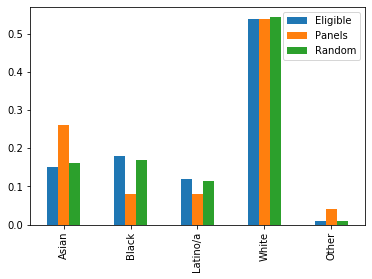

In [21]:
jury.plot(kind = "bar")

How does the distribution of the random sample compare to the eligible distribution?  To the panel distribution?

__The distribution of the random sample is similiar to the eligible distribution and very different from the panel distribution__

Let's compare the panels distribution to the eligible distribution quantitatively using hypothesis testing.  We need to choose a statistic to simulate, called the *test statistic*.  In this problem, we will use something called the *Total Variation Distance (TVD)* as the test statistic.  The TVD measures the difference between two distributions.  

First we will compute the TVD between the panels and eligible distribution:

In [22]:
jury["Difference"] = jury["Panels"] - jury["Eligible"]
jury

,Eligible,Panels,Random,Difference
Asian,0.15,0.26,0.162423,0.11
Black,0.18,0.08,0.169305,-0.10
Latino/a,0.12,0.08,0.114935,-0.04
White,0.54,0.54,0.543014,0.00
Other,0.01,0.04,0.010323,0.03


In [23]:
jury["Difference"].sum()

2.7755575615628914e-17

What is the sum of the difference column?  

__The sum of the difference column is close to zero.__


To fix this, we will take the absolute differences between probabilities.

In [24]:
jury["Absolute Difference"] = np.abs(jury["Difference"])
jury

,Eligible,Panels,Random,Difference,Absolute Difference
Asian,0.15,0.26,0.162423,0.11,0.11
Black,0.18,0.08,0.169305,-0.10,0.10
Latino/a,0.12,0.08,0.114935,-0.04,0.04
White,0.54,0.54,0.543014,0.00,0.00
Other,0.01,0.04,0.010323,0.03,0.03


What does this do?

__This function returns the absolute value of its input__

Now take the sum of the absolute difference column.  You can use the same command as when we took the sum of a filter.

In [25]:
jury["Absolute Difference"].sum()

0.28

<details> <summary>Answer:</summary>
    <code>jury["Absolute Difference"].sum()
</code>
</details>

Notice this sum is twice either the positive or negative count, so we divide it by two.  This quantity is the *total variation distance (TVD)* between the distribution of ethnicity in the eligible juror population and the panel.

In [26]:
data_tvd = jury["Absolute Difference"].sum()/2
data_tvd

0.14

We could have done this calculation in one line of code:
`np.abs(jury["Panel"] - jury["Eligible"]).sum()/2`
Try it below.

In [28]:
np.abs(jury["Panels"] - jury["Eligible"]).sum()/2

0.14

Next we want to understand the distribution of the test statistic (here, the TVD) if the panels were actually from the eligible distribution.  To do this, we want to simulate random samples from the eligible distribution and compute the total variation distance between the sample and eligible distribution.

First compute for one random sample, and compute the TVD between its probabilities and the eligible distribution.

In [33]:
sample1 = np.random.choice(population,p = pop_prob,size = 1453)
sample1 = pd.Series(sample1)
sample_probs1 = pd.value_counts(sample1, normalize = True)
data_tvd1 = np.abs(jury["Eligible"] - sample_probs1).sum()/2
data_tvd1

0.018245010323468692

Now we want to repeat this process many times, and make a histogram of the difference TVD values.  First, use a loop to generate many samples and compute the TVD to the eligible population.

In [49]:
data_tvds = []
for i in np.arange(0, 10000):
    sample = np.random.choice(population,p = pop_prob,size = 1453)
    sample = pd.Series(sample)
    sample_probs = pd.value_counts(sample, normalize = True)
    data_tvd = np.abs(jury["Eligible"] - sample_probs).sum()/2
    data_tvds.append(data_tvd)

Next make the histogram of these simulated test statistics (the TVDs).

Text(0, 0.5, 'Density')

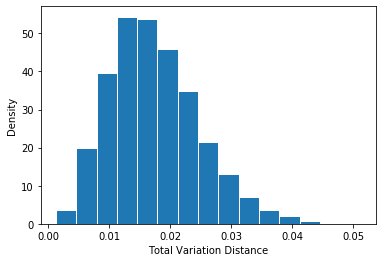

In [50]:
plt.hist(data_tvds, edgecolor = "white", bins = 15, density = True)
plt.xlabel("Total Variation Distance")
plt.ylabel("Density")

In [52]:
low = np.percentile(data_tvds, 2.5)
high = np.percentile(data_tvds, 97.5)
print("95% Confidence Interval: " + str(low) + " - " + str(high))

95% Confidence Interval: 0.005615966964900201 - 0.03407432897453547


Does the test statistic computed from the data look like it comes from this distribution?

__The test statistic computed from the data does not look like it comes from this distribution. The total variation distance between the Eligible population and the Panel population lies far outside the 95% confidence interval of the TVD.__